To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Maximum Flow Problem

In this tutorial we will solve maximum flow problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 02

A human resources company wants to create a team with the desired characteristics among the candidates registered in its database to be assigned to an event. A candidate can only work in one position. The requirements are listed below.

| Candidate | Positions | Experience group |
| :--: | :--: | :--: |
| 1 | I, II | A |
| 2 | II, IV | B |
| 3 | I | A |
| 4 | III | C |
| 5 | III, IV | C |
| 6 | II, IV | A |
| 7 | III, IV | B |
| 8 | I | C |
| 9 | II | B |
| 10 | I, II | B |

| Positions | Requirements |
| :--: | :--: |
| I | 2 |
| II | 1 |
| III | 2 |
| IV | 1 |

| Experience group | Requirements |
| :--: | :--: |
| A | 1 |
| B | 2 |
| C | 3 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("Start", {"color": "black"}),
    ("I", {"color": "black"}),
    ("II", {"color": "black"}),
    ("III", {"color": "black"}),
    ("IV", {"color": "black"}),
    ("1", {"color": "black"}),
    ("2", {"color": "black"}),
    ("3", {"color": "black"}),
    ("4", {"color": "black"}),
    ("5", {"color": "black"}),
    ("6", {"color": "black"}),
    ("7", {"color": "black"}),
    ("8", {"color": "black"}),
    ("9", {"color": "black"}),
    ("10", {"color": "black"}),
    ("A", {"color": "black"}),
    ("B", {"color": "black"}),
    ("C", {"color": "black"}),
    ("End", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "Start":np.array([0.0,0.0]),
    "I":np.array([1.0,1.5]),
    "II":np.array([1.0,0.5]),
    "III":np.array([1.0,-0.5]),
    "IV":np.array([1.0,-1.5]),
    "1":np.array([2.0,4.5]),
    "2":np.array([2.0,3.5]),
    "3":np.array([2.0,2.5]),
    "4":np.array([2.0,1.5]),
    "5":np.array([2.0,0.5]),
    "6":np.array([2.0,-0.5]),
    "7":np.array([2.0,-1.5]),
    "8":np.array([2.0,-2.5]),
    "9":np.array([2.0,-3.5]),
    "10":np.array([2.0,-4.5]),
    "A":np.array([3.0,1.0]),
    "B":np.array([3.0,0.0]),
    "C":np.array([3.0,-1.0]),
    "End":np.array([4.0,0.0])
}

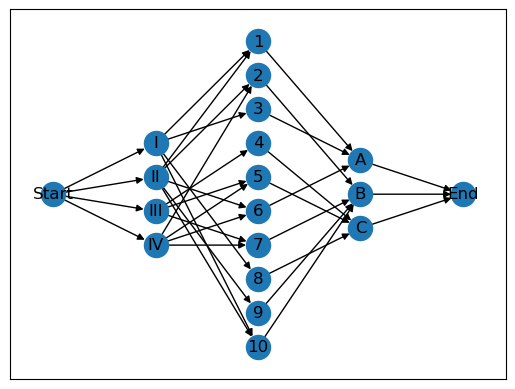

In [5]:
elist = [("Start", "I"),
         ("Start", "II"),
         ("Start", "III"),
         ("Start", "IV"),
         ("I", "1"),
         ("I", "3"),
         ("I", "8"),
         ("I", "10"),
         ("II", "1"),
         ("II", "2"),
         ("II", "6"),
         ("II", "9"),
         ("II", "10"),
         ("III", "4"),
         ("III", "5"),
         ("III", "7"),
         ("IV", "2"),
         ("IV", "5"),
         ("IV", "6"),
         ("IV", "7"),
         ("1", "A"),
         ("2", "B"),
         ("3", "A"),
         ("4", "C"),
         ("5", "C"),
         ("6", "A"),
         ("7", "B"),
         ("8", "C"),
         ("9", "B"),
         ("10", "B"),
         ("A", "End"),
         ("B", "End"),
         ("C", "End")]
G1.add_edges_from(elist)
eattrs = {("Start", "I"): {"capacity": 2},
          ("Start", "II"): {"capacity": 1},
          ("Start", "III"): {"capacity": 2},
          ("Start", "IV"): {"capacity": 1},
          ("I", "1"): {"capacity": 1},
          ("I", "3"): {"capacity": 1},
          ("I", "8"): {"capacity": 1},
          ("I", "10"): {"capacity": 1},
          ("II", "1"): {"capacity": 1},
          ("II", "2"): {"capacity": 1},
          ("II", "6"): {"capacity": 1},
          ("II", "9"): {"capacity": 1},
          ("II", "10"): {"capacity": 1},
          ("III", "4"): {"capacity": 1},
          ("III", "5"): {"capacity": 1},
          ("III", "7"): {"capacity": 1},
          ("IV", "2"): {"capacity": 1},
          ("IV", "5"): {"capacity": 1},
          ("IV", "6"): {"capacity": 1},
          ("IV", "7"): {"capacity": 1},
          ("1", "A"): {"capacity": 1},
          ("2", "B"): {"capacity": 1},
          ("3", "A"): {"capacity": 1},
          ("4", "C"): {"capacity": 1},
          ("5", "C"): {"capacity": 1},
          ("6", "A"): {"capacity": 1},
          ("7", "B"): {"capacity": 1},
          ("9", "B"): {"capacity": 1},
          ("10", "B"): {"capacity": 1},
          ("A", "End"): {"capacity": 1},
          ("B", "End"): {"capacity": 2},
          ("C", "End"): {"capacity": 3}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'capacity'), label_pos = 0.5)

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 19 nodes and 33 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 5)	1
  (1, 7)	1
  (1, 12)	1
  (1, 14)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (2, 13)	1
  (2, 14)	1
  (3, 8)	1
  (3, 9)	1
  (3, 11)	1
  (4, 6)	1
  (4, 9)	1
  (4, 10)	1
  (4, 11)	1
  (5, 15)	1
  (6, 16)	1
  (7, 15)	1
  (8, 17)	1
  (9, 17)	1
  (10, 15)	1
  (11, 16)	1
  (12, 17)	1
  (13, 16)	1
  (14, 16)	1
  (15, 18)	1
  (16, 18)	1
  (17, 18)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [9]:
maxflow_value, flows = nx.maximum_flow(G1, "Start", "End")
print(flows)

{'Start': {'I': 2, 'II': 1, 'III': 2, 'IV': 1}, 'I': {'1': 0, '3': 0, '8': 1, '10': 1}, 'II': {'1': 1, '2': 0, '6': 0, '9': 0, '10': 0}, 'III': {'4': 1, '5': 1, '7': 0}, 'IV': {'2': 1, '5': 0, '6': 0, '7': 0}, '1': {'A': 1}, '2': {'B': 1}, '3': {'A': 0}, '4': {'C': 1}, '5': {'C': 1}, '6': {'A': 0}, '7': {'B': 0}, '8': {'C': 1}, '9': {'B': 0}, '10': {'B': 1}, 'A': {'End': 1}, 'B': {'End': 2}, 'C': {'End': 3}, 'End': {}}


In [10]:
print(maxflow_value)

6


| Candidate | Positions | Experience group |
| :--: | :--: | :--: |
| 1* | I, II | A |
| 2* | II, IV | B |
| 3 | I | A |
| 4* | III | C |
| 5* | III, IV | C |
| 6 | II, IV | A |
| 7 | III, IV | B |
| 8* | I | C |
| 9 | II | B |
| 10* | I, II | B |